In [139]:
with open('libraries.py') as f:
    code = f.read()
exec(code)

In [140]:
# determine user
user = getpass.getuser()
if user == 'peymansh':
    main_folder_path = '/Users/peymansh/Dropbox (MIT)/Research/AI and Occupations/ai-exposure'
    data_path = f'{main_folder_path}/output'

In [141]:
# Pick occupation
def pick_occupation(occupation):
    if occupation == 'travelAgents':
        GPT_input_occupation = 'travel agents'
        plot_title_occupation = 'Travel Agents'
        occupation_code = '41-3041'
    elif occupation == 'insuranceUnderwriters':
        GPT_input_occupation = 'insurance underwriters'
        plot_title_occupation = 'Insurance Underwriters'
        occupation_code = '13-2053'
    
    occupation_folder = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
    return GPT_input_occupation, plot_title_occupation, occupation_code, occupation_folder


In [142]:
# set alpha as AI quality metric
alpha_list = np.linspace(0.3, 1-1e-4, 1000).tolist()

In [143]:
# Pick occupation and initialize variables
occupation = 'travelAgents'
#occupation = 'insuranceUnderwriters'

GPT_input_occupation, plot_title_occupation, occupation_code, occupation_folder = pick_occupation(occupation)

### Read Data

In [144]:
suffix = ''

manual_df = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_{suffix}manual.csv')
#firstLastTask_df = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_firstLastTask.csv')
firstLastTask_conditioned_df = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_{suffix}firstLastTask_conditioned.csv')
#partitioned_df = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_partitioned.csv')
partitioned_conditioned_df = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_{suffix}partitioned_conditioned.csv')


In [145]:
suffix = 'MAX_'

manual_df_max = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_{suffix}manual.csv')
#firstLastTask_df_max = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_firstLastTask.csv')
firstLastTask_conditioned_df_max = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_{suffix}firstLastTask_conditioned.csv')
#partitioned_df_max = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_partitioned.csv')
partitioned_conditioned_df_max = pd.read_csv(f'{occupation_folder}/{occupation}_costMin_{suffix}partitioned_conditioned.csv')


### Plots

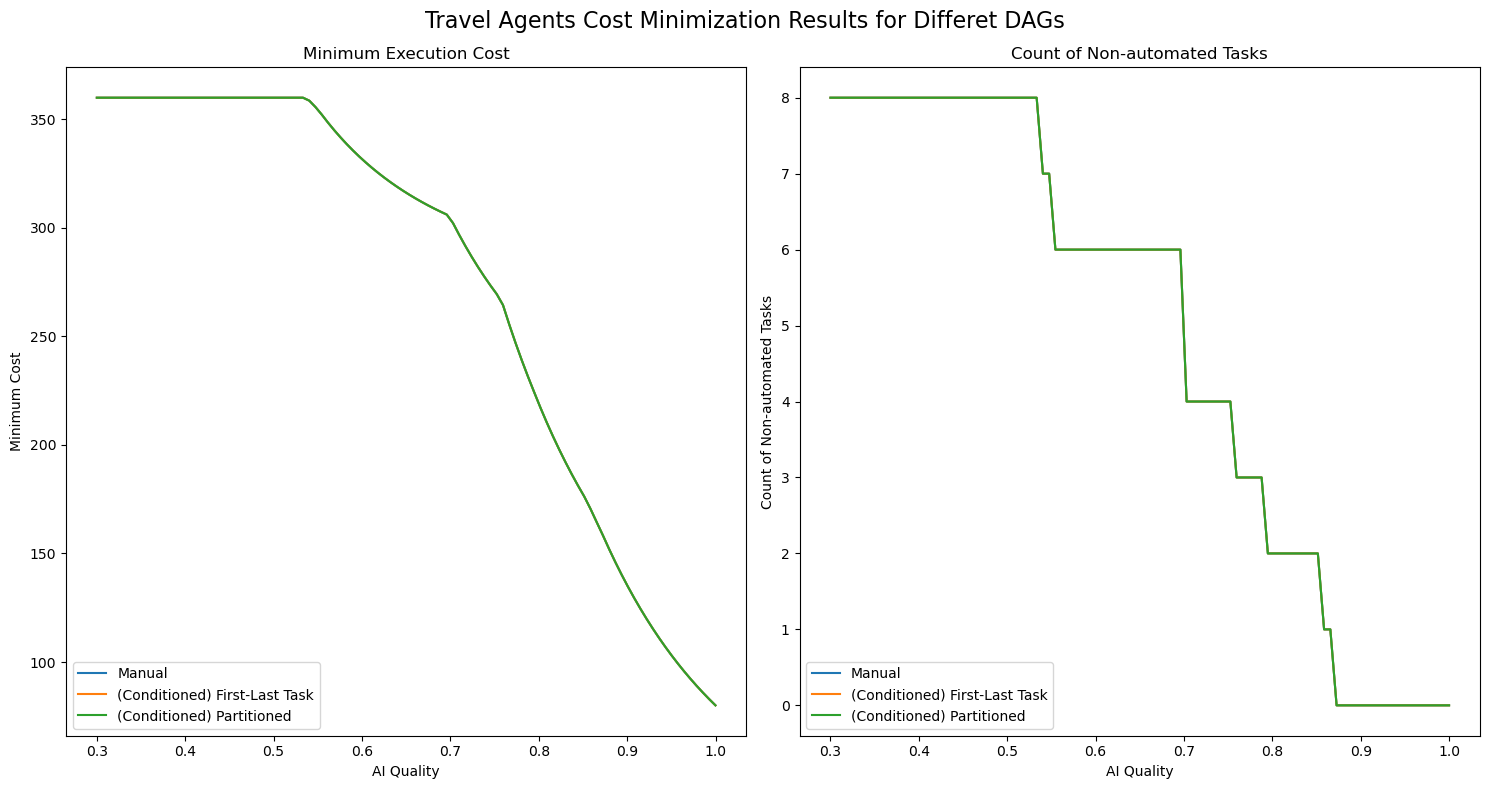

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle(f'{plot_title_occupation} Cost Minimization Results for Differet DAGs', fontsize=16)

# Plot data on the first subplot
ax1.plot(manual_df.alpha, manual_df.minimum_cost, label = 'Manual')
ax1.plot(manual_df.alpha, firstLastTask_conditioned_df.minimum_cost, label = '(Conditioned) First-Last Task')
ax1.plot(manual_df.alpha, partitioned_conditioned_df.minimum_cost, label = '(Conditioned) Partitioned')
ax1.set_title('Minimum Execution Cost')
ax1.set_xlabel('AI Quality')
ax1.set_ylabel('Minimum Cost')
ax1.legend(loc='lower left')

# Plot data on the second subplot
#ax2.axhline(y=-0, color='red', linestyle='--', alpha=0.9)
ax2.plot(manual_df.alpha, manual_df.manual_tasks_count, label = 'Manual')
ax2.plot(manual_df.alpha, firstLastTask_conditioned_df.manual_tasks_count, label = '(Conditioned) First-Last Task')
ax2.plot(manual_df.alpha, partitioned_conditioned_df.manual_tasks_count, label = '(Conditioned) Partitioned')
ax2.set_title('Count of Non-automated Tasks')
ax2.set_xlabel('AI Quality')
ax2.set_ylabel('Count of Non-automated Tasks')
ax2.legend(loc='lower left')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

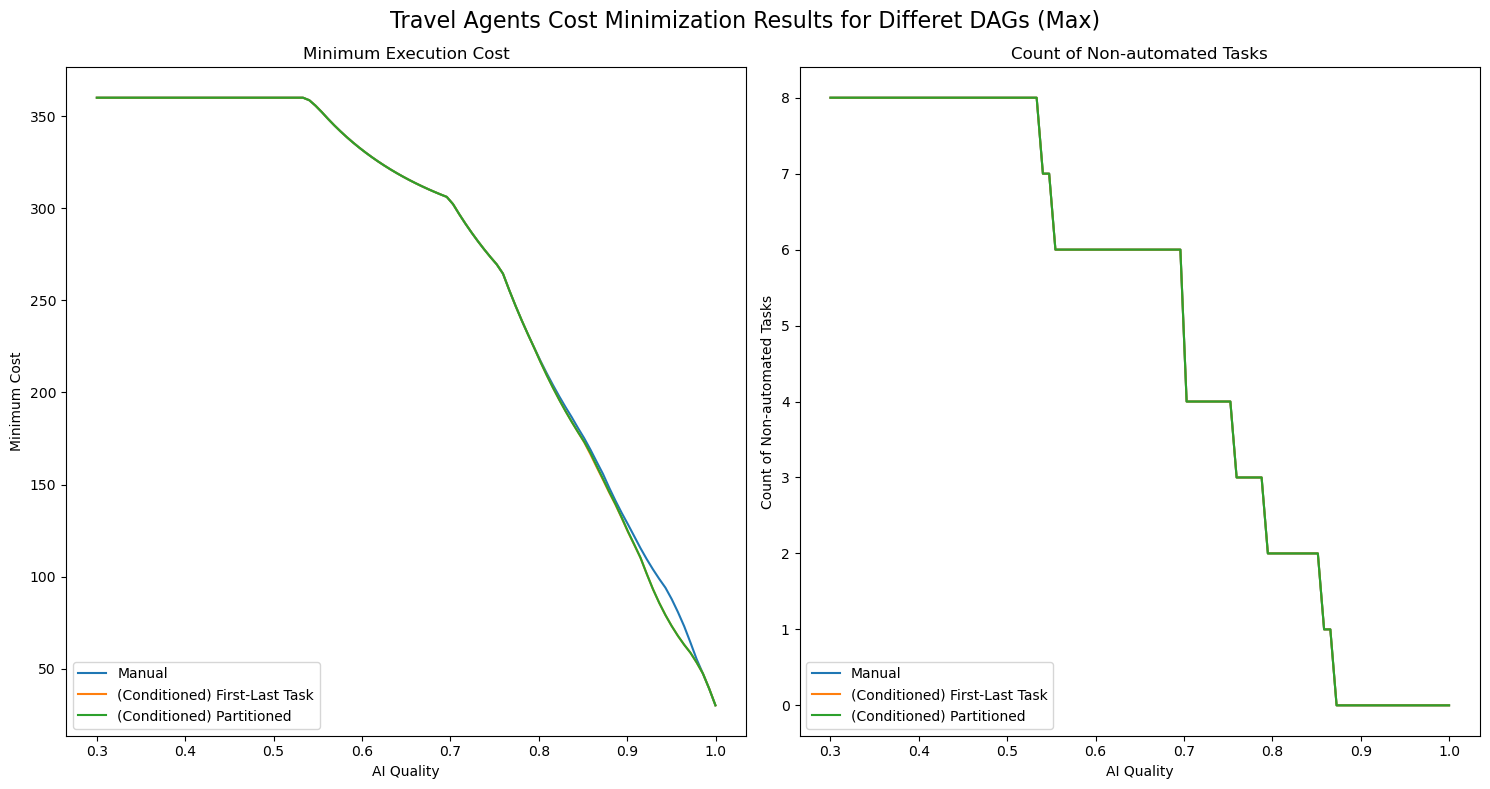

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle(f'{plot_title_occupation} Cost Minimization Results for Differet DAGs (Max)', fontsize=16)

# Plot data on the first subplot
ax1.plot(manual_df_max.alpha, manual_df_max.minimum_cost, label = 'Manual')
ax1.plot(manual_df_max.alpha, firstLastTask_conditioned_df_max.minimum_cost, label = '(Conditioned) First-Last Task')
ax1.plot(manual_df_max.alpha, partitioned_conditioned_df_max.minimum_cost, label = '(Conditioned) Partitioned')
ax1.set_title('Minimum Execution Cost')
ax1.set_xlabel('AI Quality')
ax1.set_ylabel('Minimum Cost')
ax1.legend(loc='lower left')

# Plot data on the second subplot
#ax2.axhline(y=-0, color='red', linestyle='--', alpha=0.9)
ax2.plot(manual_df_max.alpha, manual_df_max.manual_tasks_count, label = 'Manual')
ax2.plot(manual_df_max.alpha, firstLastTask_conditioned_df_max.manual_tasks_count, label = '(Conditioned) First-Last Task')
ax2.plot(manual_df_max.alpha, partitioned_conditioned_df_max.manual_tasks_count, label = '(Conditioned) Partitioned')
ax2.set_title('Count of Non-automated Tasks')
ax2.set_xlabel('AI Quality')
ax2.set_ylabel('Count of Non-automated Tasks')
ax2.legend(loc='lower left')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [148]:
def get_manual_to_machine_tasks(df):
    # Convert the string representation of lists into actual Python lists
    for col in ['optimal_scheme', 'optimal_scheme_manual_tasks']:
        df[col] = df[col].apply(ast.literal_eval)

    # Define a function to subtract lists in the next row from lists in the current row
    def subtract_lists(current_list, next_list):
        # Flatten lists for easier comparison
        current_flat = [item for sublist in current_list for item in sublist]
        next_flat = [item for sublist in next_list for item in sublist]
        
        # Subtract elements
        result_flat = [item for item in current_flat if item not in next_flat]
        
        # Rebuild the list of lists structure
        result_list = [[item] for item in result_flat]
        return result_list

    # Create the new column by applying the function to each row
    new_column = []
    for i in range(len(df) - 1):
        current_list = df.loc[i, 'optimal_scheme_manual_tasks']
        next_list = df.loc[i + 1, 'optimal_scheme_manual_tasks']
        new_column.append(subtract_lists(current_list, next_list))

    # Add the last element as an empty list (as there is no next row to subtract from)
    new_column.append([])

    # Assign the new column to the DataFrame
    df['manual_to_machine'] = new_column

    return df


manual_df = get_manual_to_machine_tasks(manual_df)
firstLastTask_conditioned_df = get_manual_to_machine_tasks(firstLastTask_conditioned_df)
partitioned_conditioned_df = get_manual_to_machine_tasks(partitioned_conditioned_df)
manual_df_max = get_manual_to_machine_tasks(manual_df_max)
firstLastTask_conditioned_df_max = get_manual_to_machine_tasks(firstLastTask_conditioned_df_max)
partitioned_conditioned_df_max = get_manual_to_machine_tasks(partitioned_conditioned_df_max)

### Compare manual_df_max and partitioned_conditioned_df_max

In [149]:
# Findings (for travel agents):
# 1) Starting from alpha = 0.79 diverge
# 2) For alpha = 0.84 optimal scheme changes for manual_df_max w/o automating a new task (rather, some tasks are bundled)
comparison_df = pd.merge(manual_df_max[['alpha', 'minimum_cost', 'optimal_scheme', 'optimal_scheme_manual_tasks']], 
                         partitioned_conditioned_df_max[['alpha', 'minimum_cost', 'optimal_scheme', 'optimal_scheme_manual_tasks']], 
                         on=['alpha'], 
                         how = 'outer')
comparison_df.iloc[69:84,:]

,alpha,minimum_cost_x,optimal_scheme_x,optimal_scheme_manual_tasks_x,minimum_cost_y,optimal_scheme_y,optimal_scheme_manual_tasks_y
69,0.79,231.49,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [2], [4]]",231.49,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [2], [4]]"
70,0.79,224.25,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",224.16,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
71,0.80,217.15,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",216.55,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
72,0.81,210.40,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",209.35,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
73,0.82,203.99,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",202.51,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
74,0.82,197.89,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",196.03,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
75,0.83,192.08,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",189.88,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
76,0.84,186.56,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[[0], [4]]",184.03,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
77,0.84,180.69,"[[0], [1, 5], [2], [3], [4], [6], [7]]","[[0], [4]]",178.48,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
78,0.85,175.11,"[[0], [1, 5], [2], [3], [4], [6], [7]]","[[0], [4]]",173.20,"[[0], [1], [2, 5], [3], [4], [6], [7]]","[[0], [4]]"
